In [1]:
import sys
sys.path.insert(0, "../..")

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from module.components.discrete_gaussian1D import DiscreteGaussian1D
from module.components.discrete_gaussian2D import DiscreteGaussian2D
from module.components.lawrence_dist import LawrenceDist

## Distribution Test Site
It is tried to find a discrete two-dimensional distribution given its mean and variance. Due to theoretical reasoning, and maximizing entropy under constrains, the functional form of the distribution $p(n,m)$ for $n,m \in \mathbb{Z}$ is:

$$
p(n, m) = \frac{1}{Z}e^{-(\frac{n - \mu_1}{\alpha_1})^2 -(\frac{m - \mu_2}{\alpha_2})^2 + \lambda n m}
$$

In [3]:
g2 = DiscreteGaussian2D()
phase_space = g2.phase_space

In [4]:
t_mean_n = np.random.randn()*5
t_mean_m = np.random.randn()*5
t_var_n = np.abs(np.random.randn())*0.1 + (t_mean_n % 1)* (1 - t_mean_n % 1)
t_var_m = np.abs(np.random.randn())*0.1 + (t_mean_m % 1)* (1 - t_mean_m % 1)
t_cov = (2*np.random.rand() - 1) * np.sqrt(t_var_n * t_var_m) * 0.4

probs = g2.calc_prob(t_mean_n, t_mean_m, t_var_n, t_var_m, t_cov)
mean_n = np.sum(phase_space[:,:,0] * probs)
mean_m = np.sum(phase_space[:,:,1] * probs)
var_n = np.sum(phase_space[:,:,0] ** 2 * probs) - mean_n **2
var_m = np.sum(phase_space[:,:,1] **2 * probs) - mean_m **2
cov =  np.sum(phase_space[:,:,0] * phase_space[:,:,1] * probs) - mean_n * mean_m

print(t_mean_n - mean_n)
print(t_mean_m - mean_m)
print(t_var_n - var_n)
print(t_var_m - var_m)
print(t_cov - cov)

# print("{:10.7f}".format(t_mean_n - mean_n))
# print("{:10.7f}".format(t_mean_m - mean_m))
# print("{:10.7f}".format(t_var_n - var_n))
# print("{:10.7f}".format(t_var_m - var_m))
# print("{:10.7f}".format(t_cov - cov))

-4.303715813946951e-06
0.0001386122577109461
-1.2181037500891279e-07
-5.826874192375875e-05
1.8161649090030901e-06


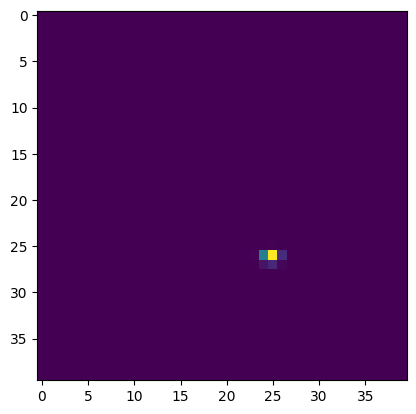

In [5]:
plt.imshow(probs)

In [50]:
probs = g2.calc_prob(5.2,3.4,0.1,8,-3)

<BarContainer object of 40 artists>

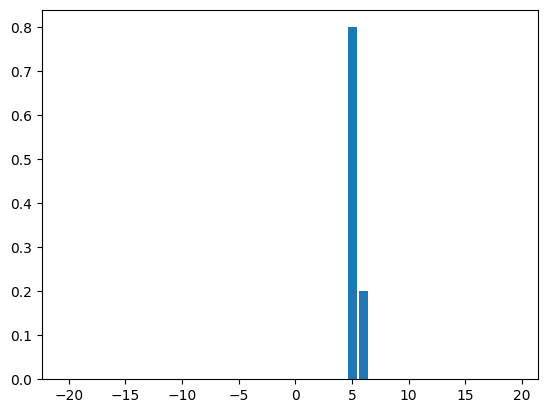

In [51]:
plt.bar(np.arange(-20, 20), np.sum(probs, axis = 0))